In [15]:
!pip install ipywidgets --quiet

# Dataframes y esas cosas

In [1]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

In [2]:
import pandas as pd

df_train = pd.read_csv("https://raw.githubusercontent.com/anamartiiins/MDS6-IDEALISTA/main/output_data/df_train_util.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/anamartiiins/MDS6-IDEALISTA/main/output_data/df_test_util.csv")

drop_columns = ['geometry',
                'barrio_id',
                'barrio',
                'precio_unitario_m2',
                'precio_logaritmico',
                'precio_mean_barrio',
                'precio_unitario_m2_mean_barrio',
                'cusec']

df_train = df_train.drop(drop_columns, axis=1)
df_test = df_test.drop(drop_columns, axis=1)

Datos para este y otros dataset del zip:

https://datos.madrid.es/FWProjects/egob/Catalogo/UrbanismoInfraestructura/Ficheros/Callejero%20oficial%20-%20descripci%C3%B3n%20de%20ficheros.pdf

In [3]:
import zipfile
import io
import requests

url_zip = 'https://github.com/anamartiiins/MDS6-IDEALISTA/raw/main/input_data/Callejero%20de%20Madrid-20240213T181500Z-001.zip'

# Descargar el archivo ZIP
response = requests.get(url_zip)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Listar los archivos en el ZIP
archivos_zip = zip_file.namelist()

# Encontrar el archivo DireccionesVigentes_20240212.csv dentro de la carpeta
carpeta = 'Callejero de Madrid'
archivo_direcciones = f"{carpeta}/DireccionesVigentes_20240212.csv"

# Leer el archivo CSV directamente desde el ZIP
with zip_file.open(archivo_direcciones) as file:
    df_direcciones = pd.read_csv(file, sep=';', encoding='ISO-8859-1')

################################################################################

# TRANSFORMACIONES

df_direcciones = df_direcciones.drop([
    'COD_VIA',
    'VIA_PAR',
    'VIA_NOMBRE_ACENTOS',
    'CLASE_APP',
    'CALIFICADOR',
    'COD_NDP',
    'UTMX_ED',
    'UTMY_ED',
    'UTMX_ETRS',
    'UTMY_ETRS',
    'TIPO_NDP',
    'ANGULO_ROTULACION',
    'COD_POSTAL'], axis=1)

# Crear un diccionario de mapeo de abreviaturas a nombres completos de distritos
distrito_mapping = {
    1: 'Centro',
    2: 'Arganzuela',
    3: 'Retiro',
    4: 'Salamanca',
    5: 'Chamartín',
    6: 'Tetuán',
    7: 'Chamberí',
    8: 'Fuencarral-El Pardo',
    9: 'Moncloa-Aravaca',
    10: 'Latina',
    11: 'Carabanchel',
    12: 'Usera',
    13: 'Puente de Vallecas',
    14: 'Moratalaz',
    15: 'Ciudad Lineal',
    16: 'Hortaleza',
    17: 'Villaverde',
    18: 'Villa de Vallecas',
    19: 'Vicálvaro',
    20: 'San Blas-Canillejas',
    21: 'Barajas'
}

# Convertir las claves del diccionario al mismo tipo de dato que la columna 'DISTRITO'
df_direcciones['DISTRITO'] = df_direcciones['DISTRITO'].astype(int).map(distrito_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Centro'
barrio_centro_mapping = {
    1.0: 'Palacio',
    2.0: 'Embajadores',
    3.0: 'Cortes',
    4.0: 'Justicia',
    5.0: 'Universidad',
    6.0: 'Sol'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Centro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Centro', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Centro', 'BARRIO'].replace(barrio_centro_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Arganzuela'
barrio_arganzuela_mapping = {
    1.0: 'Imperial',
    2.0: 'Acacias',
    3.0: 'Chopera',
    4.0: 'Legazpi',
    5.0: 'Delicias',
    6.0: 'Palos de la frontera',
    7.0: 'Atocha'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Centro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Arganzuela', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Arganzuela', 'BARRIO'].replace(barrio_arganzuela_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Retiro'
barrio_retiro_mapping = {
    1.0: 'Pacífico',
    2.0: 'Adelfas',
    3.0: 'Estrella',
    4.0: 'Ibiza',
    5.0: 'Los Jerónimos',
    6.0: 'Niño Jesús'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Retiro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Retiro', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Retiro', 'BARRIO'].replace(barrio_retiro_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Salamanca'
barrio_salamanca_mapping = {
    1.0: 'Recoletos',
    2.0: 'Goya',
    3.0: 'Fuente del Berro',
    4.0: 'Guindalera',
    5.0: 'Lista',
    6.0: 'Castellana'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Salamanca'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Salamanca', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Salamanca', 'BARRIO'].replace(barrio_salamanca_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Chamartín'
barrio_chamartin_mapping = {
    1.0: 'El Viso',
    2.0: 'Prosperidad',
    3.0: 'Ciudad Jardin',
    4.0: 'Hispanoamérica',
    5.0: 'Nueva España',
    6.0: 'Castilla'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Chamartín'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamartín', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamartín', 'BARRIO'].replace(barrio_chamartin_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Tetuán'
barrio_tetuan_mapping = {
    1.0: 'Bellas Vistas',
    2.0: 'Cuatro Caminos',
    3.0: 'Castillejos',
    4.0: 'Almenara',
    5.0: 'Valdeacederas',
    6.0: 'Berruguete'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Tetuán'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Tetuán', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Tetuán', 'BARRIO'].replace(barrio_tetuan_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Chamberí'
barrio_chamberi_mapping = {
    1.0: 'Gaztambide',
    2.0: 'Arapiles',
    3.0: 'Trafalgar',
    4.0: 'Almagro',
    5.0: 'Rios Rosas',
    6.0: 'Vallehermoso'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Chamberí'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamberí', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamberí', 'BARRIO'].replace(barrio_chamberi_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Fuencarral-El Pardo'
barrio_fuencarral_el_pardo_mapping = {
    1.0: 'El Pardo',
    2.0: 'Fuentelarreina',
    3.0: 'Peñagrande',
    4.0: 'Pilar',
    5.0: 'La Paz',
    6.0: 'Valverde',
    7.0: 'Mirasierra',
    8.0: 'El Goloso'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Fuencarral-El Pardo'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Fuencarral-El Pardo', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Fuencarral-El Pardo', 'BARRIO'].replace(barrio_fuencarral_el_pardo_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Moncloa-Aravaca'
barrio_moncloa_aravaca_mapping = {
    1.0: 'Casa de Campo',
    2.0: 'Argüelles',
    3.0: 'Ciudad Universitaria',
    4.0: 'Valdezarza',
    5.0: 'Valdemarin',
    6.0: 'El Plantio',
    7.0: 'Aravaca'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Moncloa-Aravaca'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moncloa-Aravaca', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moncloa-Aravaca', 'BARRIO'].replace(barrio_moncloa_aravaca_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Latina'
barrio_latina_mapping = {
    1.0: 'Los Cármenes',
    2.0: 'Puerta del Ángel',
    3.0: 'Lucero',
    4.0: 'Aluche',
    5.0: 'Campamento',
    6.0: 'Cuatro Vientos',
    7.0: 'Águilas'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Latina'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Latina', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Latina', 'BARRIO'].replace(barrio_latina_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Carabanchel'
barrio_carabanchel_mapping = {
    1.0: 'Comillas',
    2.0: 'Opañel',
    3.0: 'San Isidro',
    4.0: 'Vista Alegre',
    5.0: 'Puerta Bonita',
    6.0: 'Buenavista',
    7.0: 'Abrantes'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Carabanchel'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Carabanchel', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Carabanchel', 'BARRIO'].replace(barrio_carabanchel_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Usera'
barrio_usera_mapping = {
    1.0: 'Orcasitas',
    2.0: 'Orcasur',
    3.0: 'San Fermín',
    4.0: 'Almendrales',
    5.0: 'Moscardó',
    6.0: 'Zofio',
    7.0: 'Pradolongo'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Usera'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Usera', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Usera', 'BARRIO'].replace(barrio_usera_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Puente de Vallecas'
barrio_vallecas_mapping = {
    1.0: 'Entrevias',
    2.0: 'San Diego',
    3.0: 'Palomeras Bajas',
    4.0: 'Palomeras Sureste',
    5.0: 'Portazgo',
    6.0: 'Numancia'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Puente de Vallecas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Puente de Vallecas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Puente de Vallecas', 'BARRIO'].replace(barrio_vallecas_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Moratalaz'
barrio_moratalaz_mapping = {
    1.0: 'Pavones',
    2.0: 'Horcajo',
    3.0: 'Marroquina',
    4.0: 'Media Legua',
    5.0: 'Fontarrón',
    6.0: 'Vinateros'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Moratalaz'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moratalaz', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moratalaz', 'BARRIO'].replace(barrio_moratalaz_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Ciudad Lineal'
barrio_ciudad_lineal_mapping = {
    1.0: 'Ventas',
    2.0: 'Pueblo Nuevo',
    3.0: 'Quintana',
    4.0: 'La Concepción',
    5.0: 'San Pascual',
    6.0: 'San Juan Bautista',
    7.0: 'Colina',
    8.0: 'Atalaya',
    9.0: 'Costillares'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Ciudad Lineal'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Ciudad Lineal', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Ciudad Lineal', 'BARRIO'].replace(barrio_ciudad_lineal_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Hortaleza'
barrio_hortaleza_mapping = {
    1.0: 'Palomas',
    2.0: 'Piovera',
    3.0: 'Canillas',
    4.0: 'Pinar del Rey',
    5.0: 'Apóstol Santiago',
    6.0: 'Valdefuentes'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Hortaleza'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Hortaleza', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Hortaleza', 'BARRIO'].replace(barrio_hortaleza_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Villaverde'
barrio_villaverde_mapping = {
    1.0: 'Villaverde Alto - Casco Histórico de Villaverde',
    2.0: 'San Cristóbal',
    3.0: 'Butarque',
    4.0: 'Los Rosales',
    5.0: 'Ángeles'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Villaverde'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villaverde', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villaverde', 'BARRIO'].replace(barrio_villaverde_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Villa de Vallecas'
barrio_vallecas_mapping = {
    1.0: 'Casco Histórico de Vallecas',
    2.0: 'Santa Eugenia',
    3.0: 'Ensanche de Vallecas'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Villa de Vallecas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villa de Vallecas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villa de Vallecas', 'BARRIO'].replace(barrio_vallecas_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Vicálvaro'
barrio_vicalvaro_mapping = {
    1.0: 'Casco Histórico de Vicálvaro',
    2.0: 'Valdebernardo',
    3.0: 'Valderrivas',
    4.0: 'El Cañaveral'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Vicálvaro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Vicálvaro', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Vicálvaro', 'BARRIO'].replace(barrio_vicalvaro_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'San Blas-Canillejas'
barrio_sanblas_mapping = {
    1.0: 'Simancas',
    2.0: 'Hellín',
    3.0: 'Amposta',
    4.0: 'Arcos',
    5.0: 'Rosas',
    6.0: 'Rejas',
    7.0: 'Canillejas',
    8.0: 'El Salvador'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'San Blas-Canillejas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'San Blas-Canillejas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'San Blas-Canillejas', 'BARRIO'].replace(barrio_sanblas_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Barajas'
barrio_barajas_mapping = {
    1.0: 'Alameda de Osuna',
    2.0: 'Aeropuerto',
    3.0: 'Casco Histórico de Barajas',
    4.0: 'Timón',
    5.0: 'Corralejos'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Barajas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Barajas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Barajas', 'BARRIO'].replace(barrio_barajas_mapping)

In [4]:
def dms_to_decimal(dms_str):
    # Divide la cadena de DMS en partes
    parts = dms_str.replace('°', ' ').replace('\'', ' ').replace('\"', '').split()

    # Extrae grados, minutos y segundos
    degrees = float(parts[0])
    minutes = float(parts[1])
    seconds = float(parts[2]) if len(parts) > 2 else 0  # Si no hay segundos, establece en 0

    # Determina si la coordenada es norte o sur, este u oeste
    direction = 1 if parts[-1] in ['N', 'E'] else -1

    # Calcula la coordenada en formato decimal
    decimal_coordinate = direction * (degrees + minutes/60 + seconds/3600)

    return decimal_coordinate

In [5]:
# Aplica la función a todas las filas del DataFrame
df_direcciones['LATITUD_DECIMAL'] = df_direcciones['LATITUD'].apply(dms_to_decimal)
df_direcciones['LONGITUD_DECIMAL'] = df_direcciones['LONGITUD'].apply(dms_to_decimal)

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc

def distancia_euclidiana(df1, df2, df1_latitud='latitud', df1_longitud='longitud', df2_latitud='latitud', df2_longitud='longitud'):
    # Tamaño del lote (chunk)
    chunk_size = 3000

    # Calcular la cantidad total de filas
    total_filas = len(df1)

    df_resultado = pd.DataFrame()  # DataFrame para almacenar los resultados

    with tqdm(total=total_filas, desc='Processing Rows', position=0, leave=True) as pbar_total:
        for chunk_start in range(0, len(df1), chunk_size):
            chunk_end = min(chunk_start + chunk_size, len(df1))
            chunk_df1 = df1.iloc[chunk_start:chunk_end].copy()

            # Inicializar listas para almacenar resultados
            distancias_minimas = []
            indices_filas_df2 = []

            for _, row_df1 in chunk_df1.iterrows():
                latitud_given, longitud_given = row_df1[df1_latitud], row_df1[df1_longitud]

                # Calcular distancias euclidianas utilizando operaciones vectorizadas de NumPy
                latitudes_df2, longitudes_df2 = df2[df2_latitud].values, df2[df2_longitud].values

                distancias = np.sqrt(
                    (latitudes_df2 - latitud_given) ** 2 +
                    (longitudes_df2 - longitud_given) ** 2
                )

                # Encontrar la distancia mínima y el índice correspondiente
                distancia_minima, index_minimo = np.min(distancias), np.argmin(distancias)

                distancias_minimas.append(distancia_minima)
                indices_filas_df2.append(index_minimo)

                pbar_total.update(1)

            # Agregar las nuevas columnas a chunk_df1
            chunk_df1['distancia_euclidiana'] = distancias_minimas
            chunk_df1['row_df2'] = indices_filas_df2

            # Liberar memoria después de cada chunk
            del distancias_minimas, indices_filas_df2
            gc.collect()

            # Unir df1 con df2 basado en 'row_df2'
            df_resultado = pd.concat([df_resultado, pd.merge(chunk_df1, df2,
                                                             left_on='row_df2', right_index=True,
                                                             suffixes=('', '_DF2'))])

    # Restablecer el índice del DataFrame resultado
    df_resultado = df_resultado.reset_index(drop=True)

    return df_resultado

In [7]:
df_train = distancia_euclidiana(df_train, df_direcciones, 'latitud', 'longitud', 'LATITUD_DECIMAL', 'LONGITUD_DECIMAL')

Processing Rows: 100%|██████████| 54937/54937 [01:53<00:00, 481.91it/s]


In [8]:
df_test = distancia_euclidiana(df_test, df_direcciones, 'latitud', 'longitud', 'LATITUD_DECIMAL', 'LONGITUD_DECIMAL')

Processing Rows: 100%|██████████| 18380/18380 [00:43<00:00, 422.51it/s]


In [ ]:
df_train = df_train.drop(['distancia_euclidiana', 'row_df2', 'LATITUD', 'LONGITUD', 'LATITUD_DECIMAL', 'LONGITUD_DECIMAL', 'VIA_CLASE', 'VIA_NOMBRE', 'NUMERO'], axis=1)
df_test = df_test.drop(['distancia_euclidiana', 'row_df2', 'LATITUD', 'LONGITUD', 'LATITUD_DECIMAL', 'LONGITUD_DECIMAL', 'VIA_CLASE', 'VIA_NOMBRE', 'NUMERO'], axis=1)

In [10]:
# One-hot encoding de las variables categóricas
df_train = pd.get_dummies(df_train, columns=['DISTRITO', 'BARRIO'])
# Perform the same one-hot encoding on the test set
df_test = pd.get_dummies(df_test, columns=['DISTRITO', 'BARRIO'])

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selecciona las features (X) y la variable objetivo (y) después del one-hot encoding
X = df_train.drop(['precio'], axis=1)
y = df_train['precio']

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo XGBoost
model_xgb = XGBRegressor()

# Entrena el modelo
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Metrics

In [25]:
import pandas as pd
import numpy as np

def evaluate_regresion_model(model, df_test=df_test, columna='precio'):
    """
    Evalua un modelo de regresión utilizando un conjunto de prueba y calcula métricas de rendimiento.

    Parámetros:
    - model: Modelo de regresión entrenado.
    - df_test: DataFrame de prueba que contiene características donde nos se ha entrenado.
    - columna: Nombre de la columna objetivo en el DataFrame (por defecto, 'precio').

    Salida:
    Retorna un DataFrame:
    1. df_test_evaluacion: DataFrame con las predicciones y métricas para cada muestra en el conjunto de prueba.
    """

    # Obtener características utilizadas durante el entrenamiento del modelo
    features_modelo = model_xgb.feature_names_in_

    # Encontrar las columnas comunes entre las características del modelo y el conjunto de prueba
    columnas_comunes = [col for col in features_modelo if col in df_test.columns]

    # Seleccionar y reordenar las columnas del conjunto de prueba según las características del modelo
    df_prueba_modelo = df_test[columnas_comunes].copy()

    # Encontrar las características faltantes en el conjunto de prueba
    caracteristicas_faltantes_en_prueba = list(set(features_modelo) - set(df_prueba_modelo.columns))

    # Crear un DataFrame con las columnas faltantes y rellenarlas con valores 0
    df_faltantes = pd.DataFrame(0, index=df_prueba_modelo.index, columns=caracteristicas_faltantes_en_prueba)

    # Concatenar el DataFrame faltante con el conjunto de prueba
    df_prueba_modelo = pd.concat([df_prueba_modelo, df_faltantes], axis=1)

    # Organizar las columnas para que sigan el orden original de las características del modelo
    df_prueba_modelo = df_prueba_modelo[features_modelo]

    # Encontrar las columnas en df_test que no están en features
    columnas_en_test_no_en_features = list(set(df_test.columns) - set(features_modelo))

    # Encontrar las features que no están en df_test
    features_no_en_test = list(set(features_modelo) - set(df_test.columns))

    # Imprimir el número de columnas en df_test que no están en features
    print(f"Features de test que no están en el modelo: {len(columnas_en_test_no_en_features)}")

    # Imprimir el número de features que no están en df_test
    print(f"Features del modelo que no están en test: {len(features_no_en_test)}")

    # Convertir los conjuntos de datos en matrices NumPy
    X_test = df_prueba_modelo.values

    # Realizar predicciones
    predicciones = model.predict(X_test)

    # Hacer una copia para evitar modificar el DataFrame original
    df_test_evaluacion = df_test.copy()

    # Agregar las predicciones al DataFrame de prueba
    df_test_evaluacion['predicciones'] = predicciones

    # Calcular métricas de evaluación
    df_test_evaluacion['ape'] = (abs(df_test_evaluacion['predicciones'] - df_test_evaluacion[columna]) / df_test_evaluacion[columna]) * 100
    df_test_evaluacion['absolute_error'] = abs(df_test_evaluacion['predicciones'] - df_test_evaluacion[columna])
    df_test_evaluacion['error'] = df_test_evaluacion['predicciones'] - df_test_evaluacion[columna]
    df_test_evaluacion['percentage_error'] = ((df_test_evaluacion['predicciones'] - df_test_evaluacion[columna]) / df_test_evaluacion[columna]) * 100

    return df_test_evaluacion

In [26]:
# Evaluar el modelo
df_xgboost_evaluated = evaluate_regresion_model(model_xgb)

Features de test que no están en el modelo: 2
Features del modelo que no están en test: 0


# Gráficas

In [14]:
def format_magnitude(value, _):
    """
    Función para formatear los números con K o M según su magnitud.

    Parameters:
    - value: Valor numérico.
    - _: Ignorado (parámetro requerido por el formato de función).
    """
    if abs(value) >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif abs(value) >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.0f}'

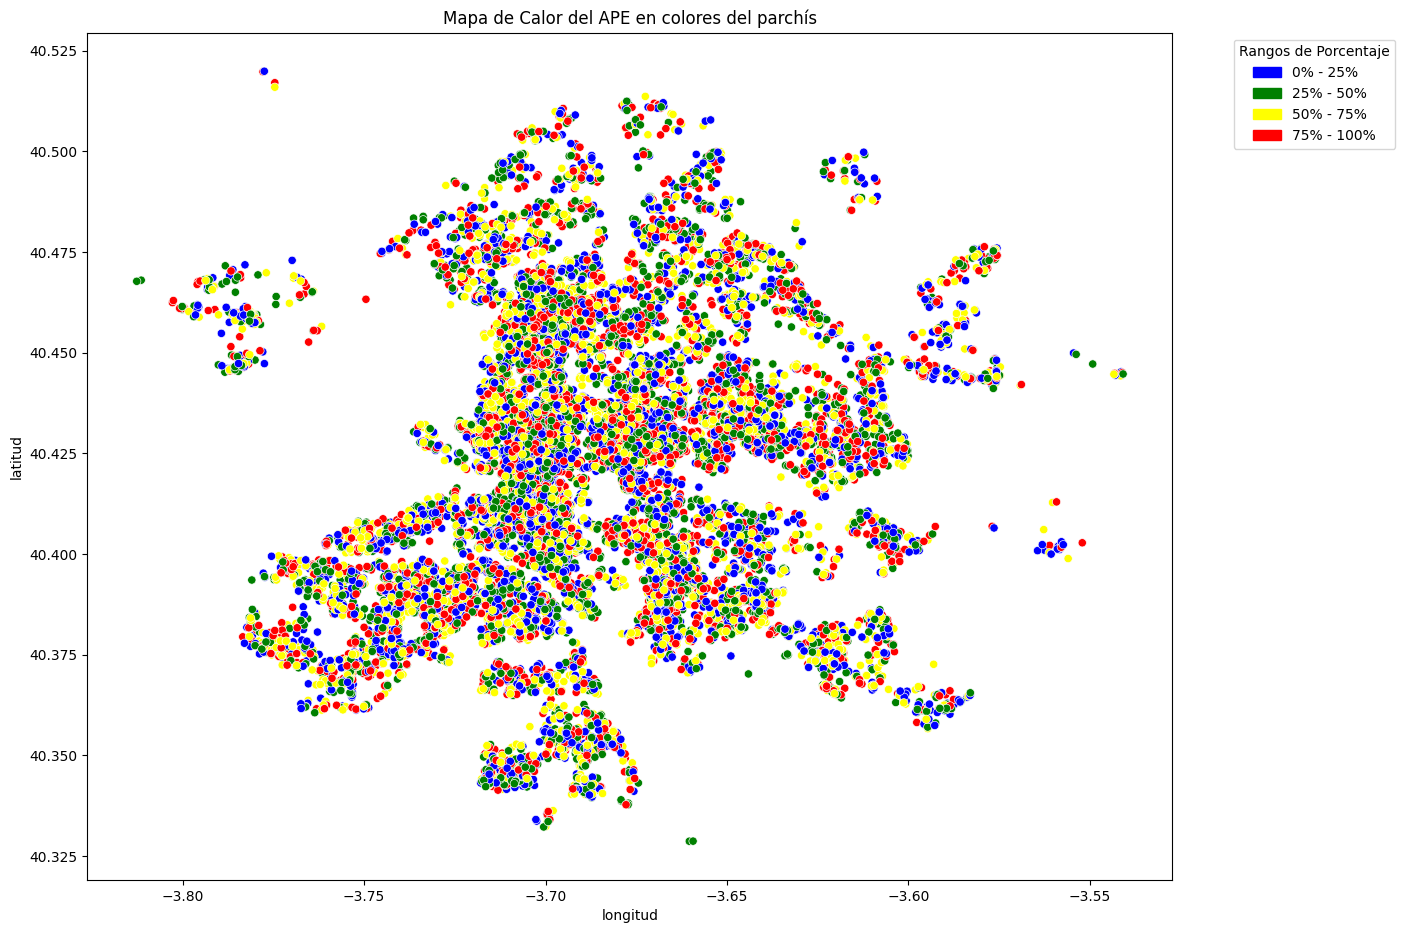

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import matplotlib.patches as mpatches

# Suponiendo que df_xgboost_evaluated es tu DataFrame
plt.figure(figsize=(14, 11))

# Obtener los valores mínimo y máximo de la columna 'ape'
min_ape_value = df_xgboost_evaluated['ape'].min()
max_ape_value = df_xgboost_evaluated['ape'].max()

# Definir los límites y colores para los rangos de porcentaje
boundaries = [0, 25, 50, 75, 100]
colors = ['blue', 'green', 'yellow', 'red']

# Crear la normalización basada en los límites y colores
norm = BoundaryNorm(boundaries, len(colors))

# Crear el gráfico de mapa de calor con colores personalizados
scatter = sns.scatterplot(x='longitud', y='latitud', hue='ape', data=df_xgboost_evaluated, palette=colors, norm=norm, legend=False)

# Crear la leyenda personalizada
legend_patches = [mpatches.Patch(color=color, label=f'{boundaries[i]}% - {boundaries[i+1]}%') for i, color in enumerate(colors)]
plt.legend(handles=legend_patches, title='Rangos de Porcentaje', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir título
plt.title('Mapa de Calor del APE en colores del parchís')

# Mostrar el gráfico
plt.show()

In [168]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [169]:
# Función para imprimir una columna, generar el gráfico de dispersión y añadir un slider
def df_mapped(dataframe):

    # Organizar df
    dataframe = dataframe.astype(float)
    dataframe = dataframe.round(6)
    columnas = dataframe.columns.tolist()

###############################################################################

    # WIDGETS

    # Crear un desplegable (dropdown) con las opciones de columnas
    dropdown_columna = widgets.Dropdown(options=columnas, description='Columna:')

    # Crear sliders para establecer el rango
    min_slider = widgets.FloatSlider(value=dataframe[columnas[0]].min(), min=dataframe[columnas[0]].min(), max=dataframe[columnas[0]].max(), description='Min:', continuous_update=False)
    max_slider = widgets.FloatSlider(value=dataframe[columnas[0]].max(), min=dataframe[columnas[0]].min(), max=dataframe[columnas[0]].max(), description='Max:', continuous_update=False)

    # Crear una fila con los widgets de métricas macro
    macro_row = widgets.HBox([widgets.Text(value=f"Mean Price: {dataframe['precio'].mean().round(6)}"),
                              widgets.Text(value=f"MAPE: {dataframe['ape'].mean().round(6)}"),
                              widgets.Text(value=f"MPE: {dataframe['percentage_error'].mean().round(6)}"),
                              widgets.Text(value=f"MAE: {dataframe['absolute_error'].mean().round(6)}"),
                              widgets.Text(value=f"ME: {dataframe['error'].mean().round(6)}")])

    # Crear un contenedor para las métricas
    metricas = widgets.Output()

    # Crear un contenedor para el gráfico
    plot_container = widgets.Output()

    # Crear un botón de acción
    calcular_button = widgets.Button(description='Calcular')

###############################################################################

    # FUNCIONES

    def calibrar_sliders(change):

        # Obtener la columna del DataFrame
        columna = dataframe[change.new]

        # Obtener el mínimo y máximo de la nueva columna
        min_valor_nuevo = columna.min()
        max_valor_nuevo = columna.max()

        # Obtener el mínimo y máximo guardados
        min_valor_guardado = min_slider.min
        max_valor_guardado = max_slider.max

        # Actualizar sliders
        if min_valor_nuevo > max_valor_guardado:
            min_slider.max, min_slider.min, min_slider.value = max_valor_nuevo, min_valor_nuevo, min_valor_nuevo
        else:
            min_slider.min, min_slider.max, min_slider.value = min_valor_nuevo, max_valor_nuevo, min_valor_nuevo

        if max_valor_nuevo < min_valor_guardado:
            max_slider.min, max_slider.max, max_slider.value = min_valor_nuevo, max_valor_nuevo, max_valor_nuevo
        else:
            max_slider.max, max_slider.min, max_slider.value = max_valor_nuevo, min_valor_nuevo, max_valor_nuevo


    def calcular_metricas(b):

          # Limpiar el área de las métricas y el gráfico
          with metricas:
              clear_output(wait=True)
          with plot_container:
              clear_output(wait=True)

          columna_seleccionada = dropdown_columna.value
          min_valor = min_slider.value
          max_valor = max_slider.value

          # Filtrar el DataFrame para incluir solo las filas dentro del rango definido por min y max
          df_filtrado = dataframe[(dataframe[columna_seleccionada] >= min_valor) & (dataframe[columna_seleccionada] <= max_valor)]

          # Calcular las métricas
          mean_price = df_filtrado['precio'].mean().round(6)
          mape = df_filtrado['ape'].mean().round(6)
          mpe = df_filtrado['percentage_error'].mean().round(6)
          mae = df_filtrado['absolute_error'].mean().round(6)
          me = df_filtrado['error'].mean().round(6)

          # Limpiar el área de las métricas y mostrar las métricas actualizadas
          with metricas:
              display(widgets.HBox([
                  widgets.Text(value=f"Mean Price: {mean_price}"),
                  widgets.Text(value=f"MAPE: {mape}"),
                  widgets.Text(value=f"MPE: {mpe}"),
                  widgets.Text(value=f"MAE: {mae}"),
                  widgets.Text(value=f"ME: {me}")
              ]))

          # Generar el gráfico de dispersión en blanco y negro
          with plot_container:
              generate_scatter_plot(df_filtrado, min_valor, max_valor, columna_seleccionada)



    # Generar el gráfico de dispersión con escala logarítmica para el APE y barra de color
    def generate_scatter_plot(df, min_value, max_value, column_name, lat_column='latitud', lon_column='longitud'):
        plt.figure(figsize=(14, 11))

        # Calcular el logaritmo del APE + 1 para evitar problemas con log(0)
        df['log_ape'] = np.log1p(df['ape'])

        scatter = sns.scatterplot(x=lon_column, y=lat_column, data=df, hue='log_ape', palette='gray_r', legend=False)

        mappable = plt.cm.ScalarMappable(cmap='gray_r')
        mappable.set_array([])

        # Establecer los límites de la barra de color con valores logarítmicos
        mappable.set_clim(df['log_ape'].min(), df['log_ape'].max())

        plt.colorbar(mappable, label='Log(APE + 1)')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')

        plt.title('Hay {} puntos entre los rangos {} y {} de la columna "{}"'.format(len(df), min_value, max_value, column_name))

        plt.show()



###############################################################################

    # CONFIGURACIONES

    # Configurar widgets interactivos
    dropdown_columna.observe(calibrar_sliders, names='value')

    # Configuración del botón
    calcular_button.on_click(calcular_metricas)


    # Crear una fila con los widgets y el contenedor de métricas y el contenedor del gráfico
    widgets_row = widgets.VBox([widgets.HBox([dropdown_columna, min_slider, max_slider, calcular_button]),
                                macro_row,
                                metricas,
                                plot_container])

    # Mostrar la fila de widgets y la salida de los resultados y los filtros
    display(widgets_row)

In [170]:
df_mapped(df_xgboost_evaluated)

In [187]:
def plot_predicciones_vs_reales(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Función para trazar un gráfico de dispersión de valores predichos vs valores reales con líneas conectando los puntos.

    Parameters:
    - df: DataFrame de pandas que contiene las columnas de valores reales y predichos.
    - y_true_column: Nombre de la columna que contiene los valores reales (por defecto: 'precio').
    - y_pred_column: Nombre de la columna que contiene los valores predichos (por defecto: 'predicciones').
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df[y_pred_column], df[y_true_column], alpha=0.7, label='Puntos')
    plt.plot([min(df[y_pred_column]), max(df[y_pred_column])], [min(df[y_true_column]), max(df[y_true_column])], color='red', linestyle='--', linewidth=2, label='Línea de 1:1')
    plt.title('Valores Predichos vs Valores Reales')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Valores Reales')
    plt.legend()
    plt.grid(True)
    plt.show()

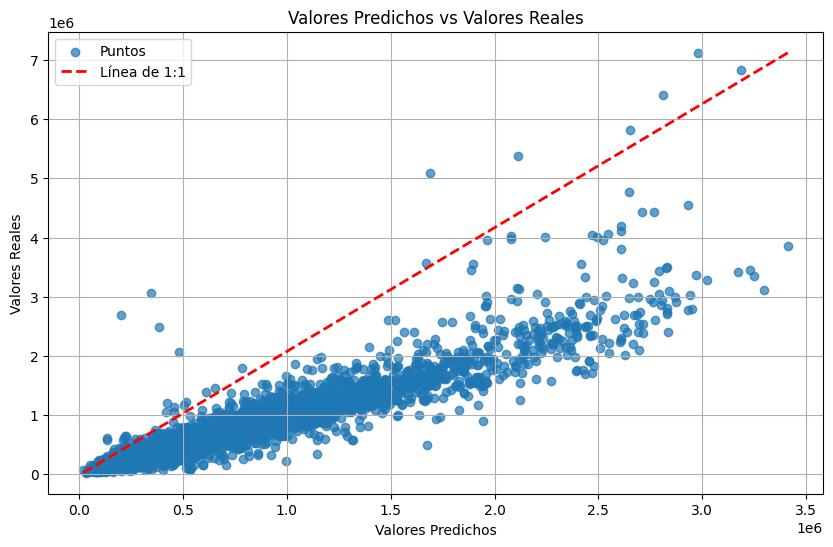

In [188]:
# Ejemplo de uso
plot_predicciones_vs_reales(df_xgboost_evaluated)

## Residuos

In [190]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as ticker
import seaborn as sns

def plot_residuals_vs_ajustados(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Genera el gráfico de residuales en función de los valores ajustados.

    Parameters:
    - df: DataFrame que contiene los datos.
    - y_true_column: Nombre de la columna con los valores reales.
    - y_pred_column: Nombre de la columna con los valores predichos por el modelo.
    """
    residuals = df[y_true_column] - df[y_pred_column]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[y_pred_column], y=residuals, alpha=0.7, label='Residuos')
    plt.axhline(y=0, color='red', linestyle='--', label='Línea base')
    plt.title('Residuos vs. Valores Ajustados')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.legend()

    # Aplica la función de formato a las etiquetas de los ejes
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_magnitude))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_magnitude))

    plt.show()

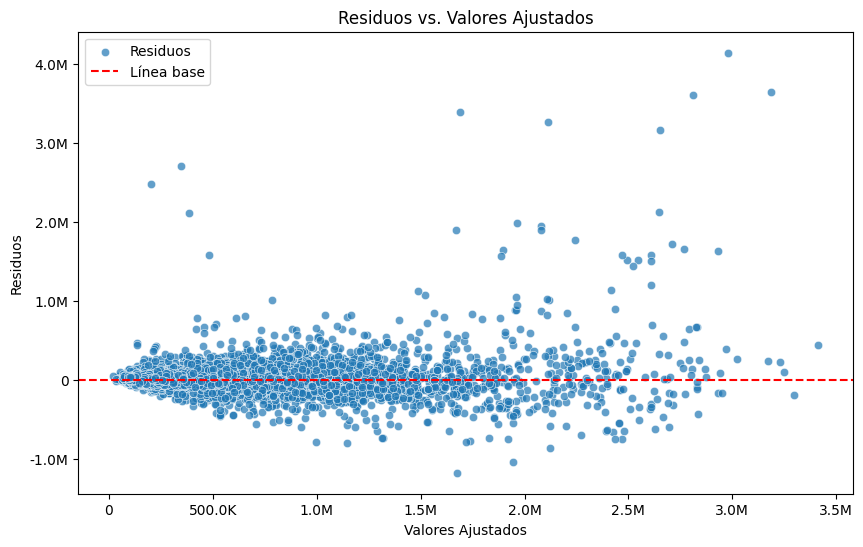

In [191]:
# Ejemplo de uso:
plot_residuals_vs_ajustados(df_xgboost_evaluated)

In [192]:
def plot_qq_plot(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Genera el gráfico cuantil-cuantil (Normal Q-Q).

    Parameters:
    - df: DataFrame que contiene los datos.
    - y_true_column: Nombre de la columna con los valores reales.
    - y_pred_column: Nombre de la columna con los valores predichos por el modelo.
    """
    residuals = df[y_true_column] - df[y_pred_column]

    # Genera el gráfico Q-Q con Seaborn
    plt.figure(figsize=(10, 6))
    sm.qqplot(residuals, line='s')
    plt.title('Normal Q-Q')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de los residuos')
    plt.grid(True)
    sns.despine()
    plt.show()

<Figure size 1000x600 with 0 Axes>

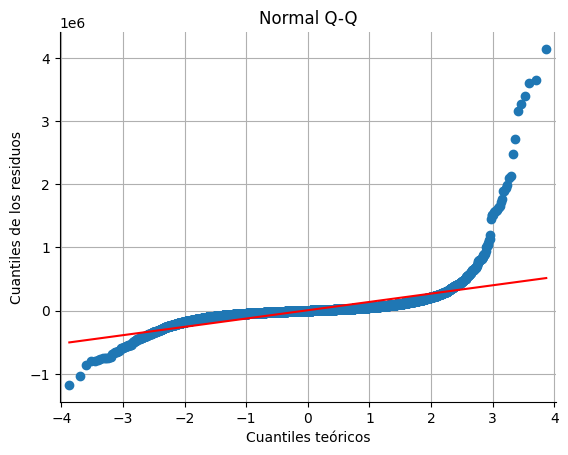

In [193]:
# Ejemplo de uso
plot_qq_plot(df_xgboost_evaluated)

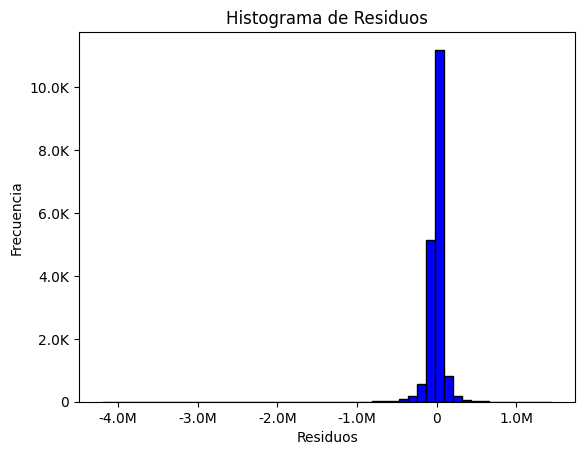

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_residual_histogram(df_evaluacion, bins=50):
    """
    Plotea un histograma de los residuos.

    Parámetros:
    - df_evaluacion: DataFrame con las predicciones y métricas.
    - bins: Número de compartimentos para el histograma.

    Uso:
    >>> plot_residual_histogram(df_evaluacion, bins=50)
    """
    # Crear una figura y ejes
    fig, ax = plt.subplots()

    # Calcular los residuos
    residuos = df_evaluacion['error']

    # Plotear el histograma de residuos
    ax.hist(residuos, bins=bins, color='blue', edgecolor='black')

    # Aplicar el formato de magnitud a los ejes x e y
    ax.xaxis.set_major_formatter(FuncFormatter(format_magnitude))
    ax.yaxis.set_major_formatter(FuncFormatter(format_magnitude))

    # Añadir etiquetas y título
    ax.set_xlabel('Residuos')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Histograma de Residuos')

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
# Suponiendo que 'df_evaluacion' es el resultado de la evaluación
plot_residual_histogram(df_xgboost_evaluated)

In [ ]:
def plot_residuals(df_evaluacion, columna='precio'):
    residuals = df_evaluacion['error']
    plt.scatter(df_evaluacion[columna], residuals)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Residuos')
    plt.title('Residuos vs. Valores Reales')

    # Crear una instancia de Axes
    ax = plt.gca()

    # Aplicar el formato de magnitud a los ejes x e y
    ax.xaxis.set_major_formatter(FuncFormatter(format_magnitude))
    ax.yaxis.set_major_formatter(FuncFormatter(format_magnitude))

    plt.show()

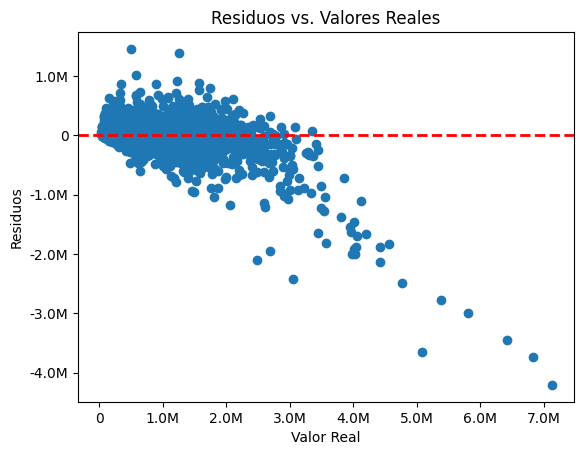

In [ ]:
plot_residuals(df_xgboost_evaluated)

In [ ]:
def plot_residuals_influence(model, df_evaluacion=df_test, columna='precio'):
    # Hacer una copia del DataFrame de evaluación
    df_evaluacion = df_test.copy()

    # Dividir el DataFrame de evaluación en características
    X_evaluacion = df_evaluacion.drop(columna, axis=1)

    # Agregar las predicciones al DataFrame de evaluación
    df_evaluacion['predicciones'] = model.predict(X_evaluacion)

    # Calcular los residuos
    df_evaluacion['error'] = df_evaluacion['predicciones'] - df_evaluacion[columna]

    # Gráfico de residuos
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df_evaluacion[columna], y=df_evaluacion['error'])
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Residuos')
    plt.title('Residuos vs. Valores Reales')

    # Gráfico de influencia
    plt.subplot(1, 2, 2)
    sns.regplot(x=df_evaluacion['error'], y=df_evaluacion['predicciones'])
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Residuos')
    plt.ylabel('Predicciones')
    plt.title('Influencia de Residuos en Predicciones')

    plt.tight_layout()
    plt.show()

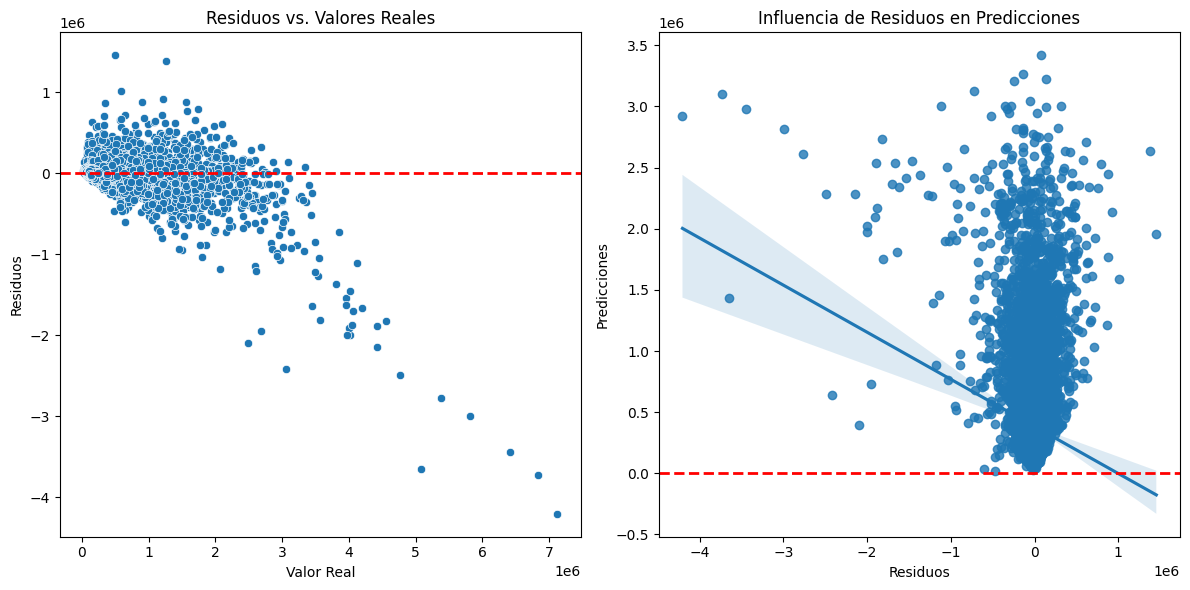

In [ ]:
# Llamar a la función para plotear residuos e influencias sin calcular métricas macro
plot_residuals_influence(model_xgb)

In [181]:
def plot_importancias(model, X_train):
    # Obtener los nombres de las columnas desde X_train
    feature_names = X_train.columns

    # Obtener las importancias
    importancias = pd.Series(model.feature_importances_, index=feature_names)

    # Ordenar las importancias por valor en orden descendente
    importancias = importancias.head(20).sort_values(ascending=False)

    # Plotear las importancias ordenadas
    plt.figure(figsize=(12, 6))
    importancias.plot(kind='bar')
    plt.title('Importancia de Características en XGBoost')
    plt.xlabel('Características')
    plt.ylabel('Importancia')
    plt.show()

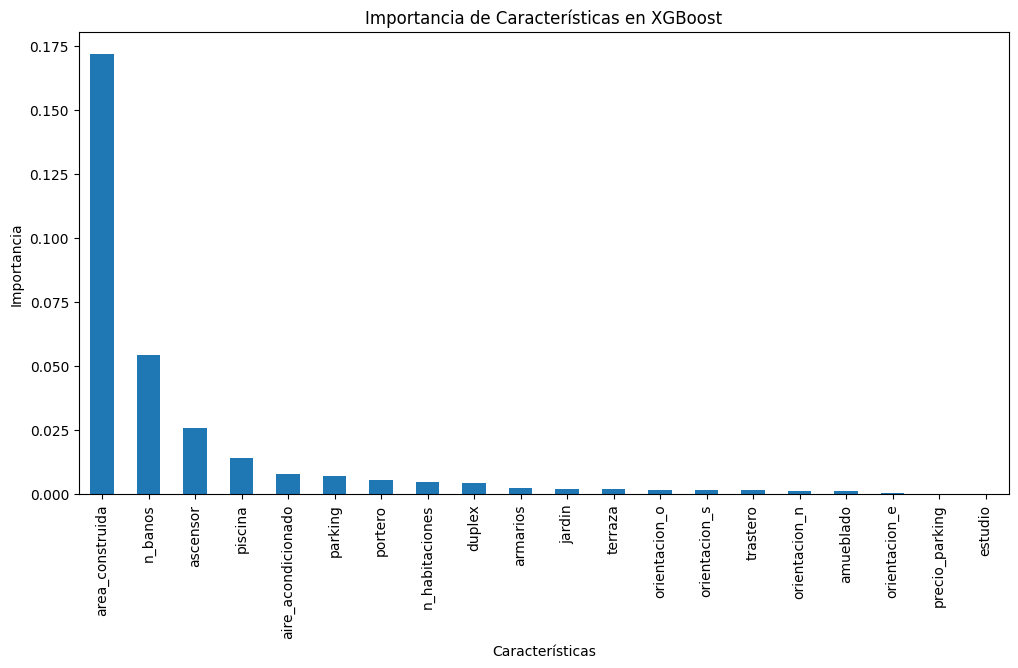

In [182]:
# Llamar a la función para plotear las importancias
plot_importancias(model_xgb, X_train)

In [183]:
def obtener_importancia_caracteristicas(modelo, nombres_caracteristicas=None):
    """
    Obtiene la importancia de las características desde un modelo.

    Parámetros:
    - modelo: El modelo entrenado (por ejemplo, un modelo XGBoost).
    - nombres_caracteristicas: Lista de nombres de características (por defecto, usa las columnas de df_test).

    Retorna:
    - DataFrame con la importancia de las características.
    """
    if nombres_caracteristicas is None:
        nombres_caracteristicas = modelo.get_booster().feature_names

    importancia = modelo.feature_importances_

    if len(nombres_caracteristicas) != len(importancia):
        raise ValueError("Las listas de nombres de características y la importancia deben tener la misma longitud.")

    df_importancia = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Importancia': importancia})
    df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
    return df_importancia

In [184]:
obtener_importancia_caracteristicas(model_xgb)

,Caracteristica,Importancia
0,area_construida,0.171810
47,DISTRITO_Salamanca,0.055851
2,n_banos,0.054504
33,DISTRITO_Arganzuela,0.044980
49,DISTRITO_Tetuán,0.043565
...,...,...
134,BARRIO_Orcasur,0.000000
42,DISTRITO_Latina,0.000000
40,DISTRITO_Fuencarral-El Pardo,0.000000
142,BARRIO_Peñagrande,0.000000
